In [1]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist_0 = pd.read_csv("mnist_train.csv")

In [3]:
mnist_0.shape

(42000, 785)

In [4]:
mnist_0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = mnist_0["label"]
mnist_df = mnist_0.drop("label",axis = 1)
print(mnist_df.head())
mnist_df.shape

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

(42000, 784)

C:\Users\Houssem Hosni\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


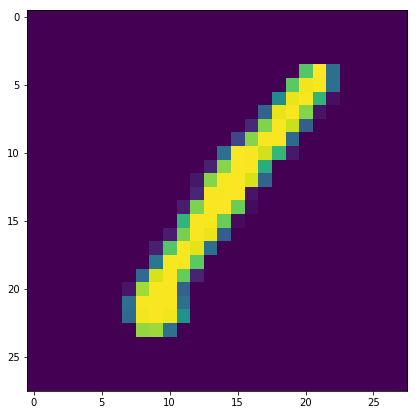

1


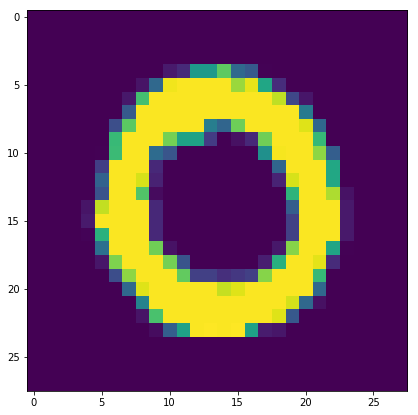

0


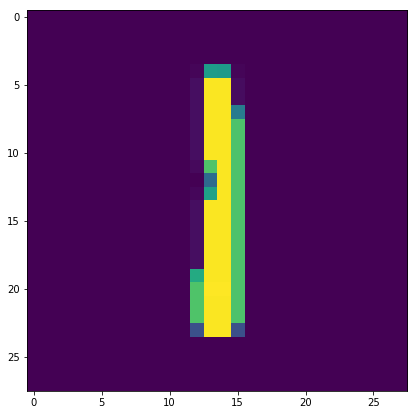

1


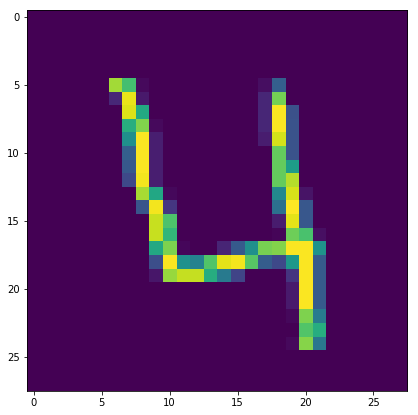

4


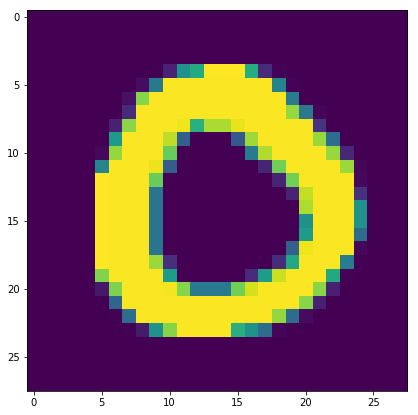

0


In [11]:
# Let's display some data points
for i in range(5):
    data_point = mnist_df.iloc[i]
    row_to_mat = data_point.as_matrix().reshape(28,28)
    plt.figure(figsize=(7,7))
    plt.imshow(row_to_mat)    
    plt.show()
    print(y[i])
    

# 2D Visualization using PCA

### Working on the whole 42k MNIST data points 

In [95]:
labels = y
data_mnist = mnist_df

In [96]:
data_mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
print("The shape of labels: ",labels.shape,"\nThe shape of sample data: ",data_mnist.shape)

The shape of labels:  (42000,) 
The shape of sample data:  (42000, 784)


In [98]:
# Data pre-processing : Data standardization mean(columns) = 0, std(columns) = 1 
#feature fi <-- (fi - mean(fi)) / std(fi) (for i:1:784)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data_mnist)
print("Shape of standardized data: ", X.shape)

Shape of standardized data:  (42000, 784)


In [99]:
# Let's create our covariance matrix
covar_matrix = np.matmul(X.T,X)
print("The shape of our covariance matrix: ",covar_matrix.shape)

The shape of our covariance matrix:  (784, 784)


In [100]:
from scipy.linalg import eigh
# Let's calculate the eigenvalues and eigenvectors related to covariance matrix 
values, vectors = eigh(covar_matrix,eigvals=(782,783))
# Converting our X array to the new V1,V2 space 
new_X = np.matmul(X,vectors)

In [101]:
print(new_X.shape)

(42000, 2)


In [102]:
new_coord = np.vstack((new_X.T,labels))
new_coord = new_coord.T

In [103]:
new_coord.shape

(42000, 3)

In [104]:
final_df = pd.DataFrame(data = new_coord,columns=("1st_Component", "2nd_Component", "label"))
print(final_df.head())

   1st_Component  2nd_Component  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


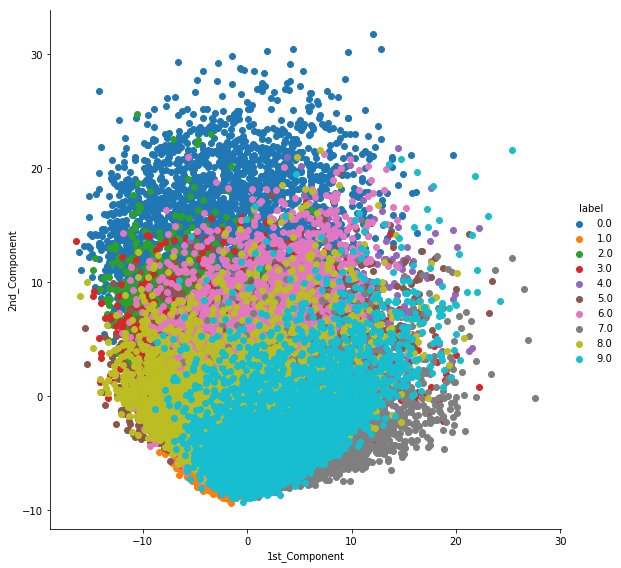

In [117]:
sns.FacetGrid(final_df,hue="label",height = 8).map(plt.scatter,"1st_Component", "2nd_Component").add_legend()
plt.show()

### Observations on this PCA output
* From the vizualization above we notice some groupings such as those of zero and nine labels. However we can clearly notice a lot of overlap between the different labels which makes localizing target values somehow complicated.
* PCA does not perform great job with visualization.

## PCA using Scikit-Learn

In [106]:
from sklearn import decomposition
pca = decomposition.PCA()

In [118]:
pca.n_components = 2
new_X_skl = pca.fit_transform(X)

In [119]:
new_X_skl.shape

(42000, 2)

In [120]:
new_coord_Skl = np.vstack((new_X_skl.T,labels)).T

In [121]:
new_coord_Skl.shape

(42000, 3)

In [122]:
final_df_Skl = pd.DataFrame(new_coord_Skl,columns=("1st_Component", "2nd_Component", "label"))
print(final_df_Skl.head())
print("The shape of the visual_PCA_ready dataframe is:", final_df_Skl.shape)

   1st_Component  2nd_Component  label
0      -5.140499      -5.226380    1.0
1      19.292306       6.033032    0.0
2      -7.644509      -1.705716    1.0
3      -0.474195       5.835949    4.0
4      26.559555       6.024847    0.0
The shape of the visual_PCA_ready dataframe is: (42000, 3)


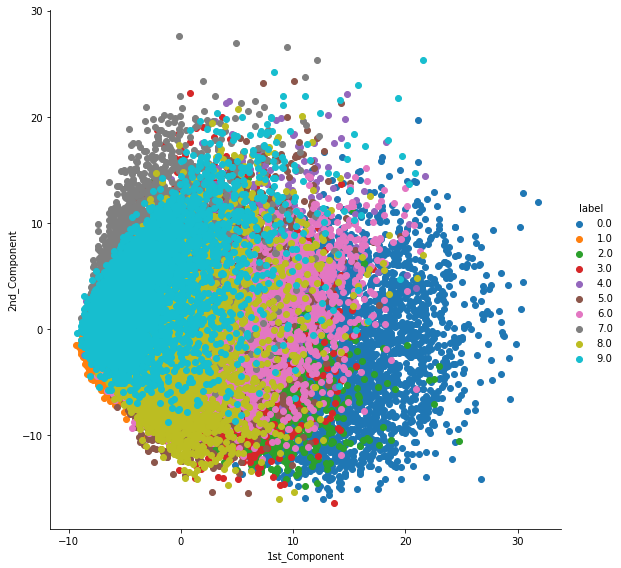

In [123]:
# Visualizing PCA got with Scikit-Learn
plt.close()
sns.FacetGrid(final_df_Skl,hue="label",height=8).map(plt.scatter,"1st_Component", "2nd_Component").add_legend()
plt.show()

This visual PCA output is roughly the same as the previous one with 90° rotation (still has lot of overlap).

# PCA for dimensionality reduction (only)

Objective: Determine the minimum number of principal components such that the transformation of the data to the new space keeps a desirable explained original variance

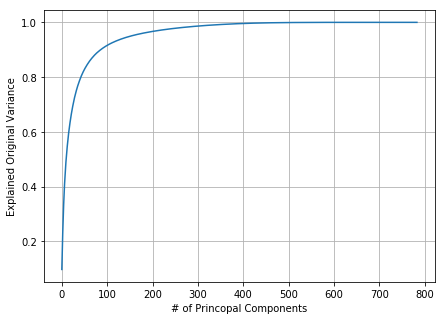

In [113]:
pca.n_components = 784
pca_forDR_data = pca.fit_transform(data_mnist)
percent_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cumulative_var_explained = np.cumsum(percent_var_explained)
plt.figure(1, figsize=(7,5))
plt.clf()
plt.plot(cumulative_var_explained)
plt.xlabel("# of Princopal Components")
plt.ylabel("Explained Original Variance")
plt.grid()
plt.axis("tight")
plt.show()


###### Observations : 
1. 100 nodes enable us to retain roughly 90% of original variance explained while transforming our MNIST data form 784-D space to a space of of 200 principal components gets 95% of original variance explained(informations about original data)
2. PCA cares about the directions that maximize variance. It preserves/cares about the global structure the data. It doesn't care about the local structure of data or the distance between data points. So let's move on to explore t-SNE approach ! 

### Philosophy behind t-SNE
1. Taking care about distance separating the different data points in the original high dimensional data. 
2. Trying to preserve the neighborhoods of data points while embedding them into the less dimensinal space. (It litterally does a neighborhood preserving embedding)
3. t-SNE depends on two main parameters namely "perplexity"(neighborhoods) and "step" (number of iterations)
4. t-SNE tries to shrink sparse clusters and expand dense ones.
5. t-SNE does not preserve distances between clusters
6. More the step and perplexity (# of neighbors to preserve)parameters are well selected, better and closer the shape and the structure/topology of will be.
7. Good Perplexity and step (number of iterations) give stable/same results even when we run t-SNE multiple times. When results change then t-SNE parameters should be tuned.


## t-SNE using scikit-learn

In [126]:
from sklearn.manifold import TSNE
# Our tsne model transforms 784-dimensional data to 2-D space. Fixing "random_state" helps stabilize tsne model outputs
tsne_model = TSNE(n_components=2,random_state=0)
new_X_tsne = tsne_model.fit_transform(X)

shape of finale dataframe: (42000, 3)
   1st_Component  2nd_Component  label
0     -42.813740     -34.236633    1.0
1      11.952191      49.552940    0.0
2     -61.235588       1.452946    1.0
3      19.710300     -59.542892    4.0
4      18.527527      57.053226    0.0


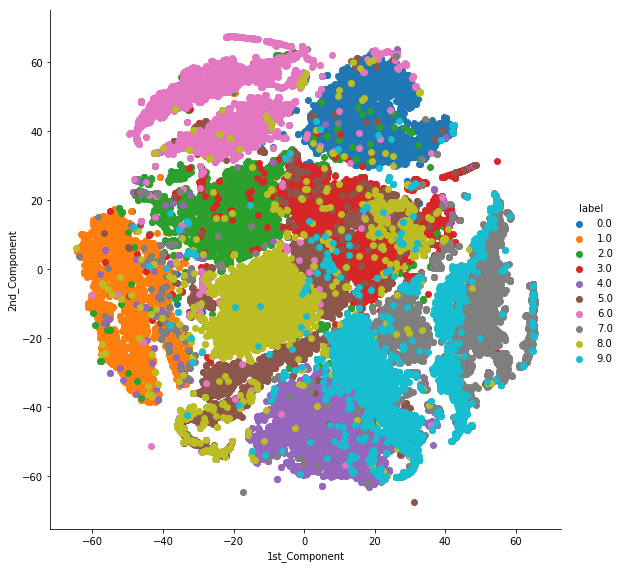

In [128]:
new_coor_tsne = np.vstack((new_X_tsne.T,labels)).T
final_tsne_df = pd.DataFrame(new_coor_tsne,columns=("1st_Component", "2nd_Component", "label"))
print("shape of finale dataframe:",final_tsne_df.shape)
print(final_tsne_df.head())
plt.close()
sns.FacetGrid(final_tsne_df,hue="label",height=8).map(plt.scatter,"1st_Component", "2nd_Component").add_legend()
plt.show()

Observation : The t-SNE output is much better than PCA visualization. Even with using perplexity = 30
we got roughly the ten data points clusters for our 10 digits.
Now we are going to try perplexity = 50, step(number of iterations) = 5000

### t-SNE on MNIST data with perplexity = 50, step = n_iter = 5000

In [129]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
new_X_tsne50 = model.fit_transform(X)

shape of finale dataframe: (42000, 3)
   1st_Component  2nd_Component  label
0    -105.948997       9.524521    1.0
1      27.666298     108.488770    0.0
2     -98.092995     -70.116554    1.0
3     -18.312017    -119.733322    4.0
4      25.096529     131.405319    0.0


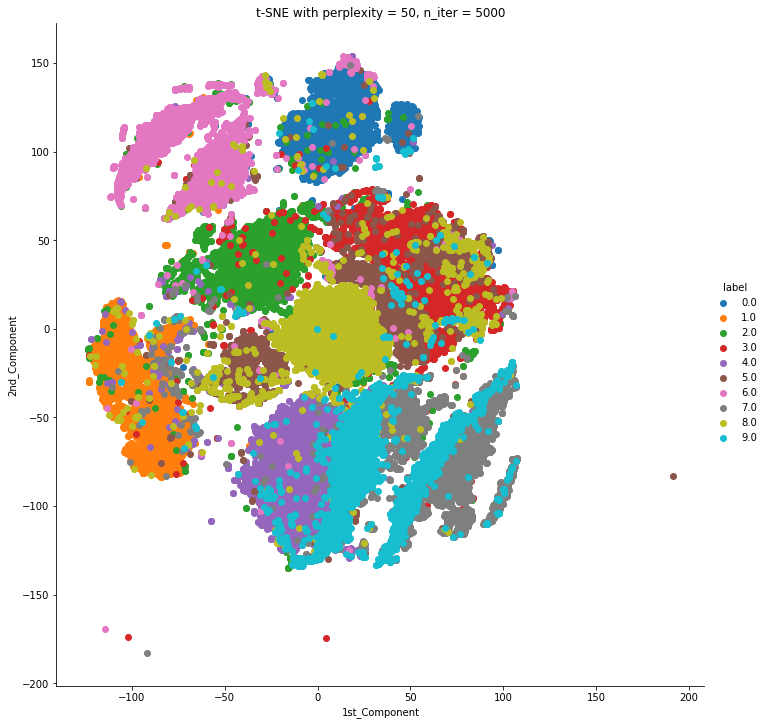

In [133]:
new_tsne = np.vstack((new_X_tsne50.T,labels)).T
final_tsne_df = pd.DataFrame(new_tsne,columns=("1st_Component", "2nd_Component", "label"))
print("shape of finale dataframe:",final_tsne_df.shape)
print(final_tsne_df.head())
plt.close()
sns.FacetGrid(final_tsne_df,hue="label",height=10).map(plt.scatter,"1st_Component", "2nd_Component").add_legend()
plt.title("t-SNE with perplexity = 50, n_iter = 5000")
plt.show()

### Observations:
* Well as it is shown above, t-SNE performs far better than PCA while visualizing the embeddings in the new 2D space defined only by two components.
* Clusters representing digits form 0 to 9 are easily detectable now. Of course there are still some overlaps here and there (maybe we have to increase and modify our t-SNE parameters and see what it gives as a visual output).
* The constraint here is that running the above t-SNE model on our 42k rows with perplexity = 50 and step = 5000, tooks roughly 4 hours (laptop i7,16Go Ram). Maybe We can slice our data and take some sub-dataframe (2000 or 1000 rows) and try many combinations of (perplexity,n_iterations) and pick up the best one.